### 4.1 **Complex Demodulation**
Assume a radar which receives the following RF signal:

&nbsp;&nbsp;&nbsp;&nbsp;$u_{RF}(\tau) = \text{rect}\left(\frac{\tau}{\tau_p}\right) \cdot \cos(2\pi f_0 \tau + \pi k_r \tau^2) $<br>
with a pulse length of $\tau_p = 1 \, \mu s $ and a center frequency of $f_0 = 500 \, \text{MHz}$.<br>

* Compute and plot the real and imaginary parts of the equivalent lowpass
 signal assuming first 𝑘𝑟=0. Can you explain the complex-valued baseband 
signal? 

* How does the equivalent low pass signal change when you introduce an additional range delay $ \Delta \tau = \frac{2r}{c_0}$ into the received signal <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\tau -> \tau-\Delta \tau = \tau - \frac{2r}{c_0}$<br>
What happens if you change 𝑟 by 12.5%, 25% and 50% of the wavelength? 

* Repeat the previous simulations for $ k_r \in (10^{13} \, \text{Hz/s}, 10^{14} \, \text{Hz/s} )$ . How does the equivalent lowpass signal change when the chirp rate $k_r$ is varied? How does the baseband signal change for negative chirp rates?





c:\Users\siva1\UDEMY_PROJECTS\sample_project\env\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


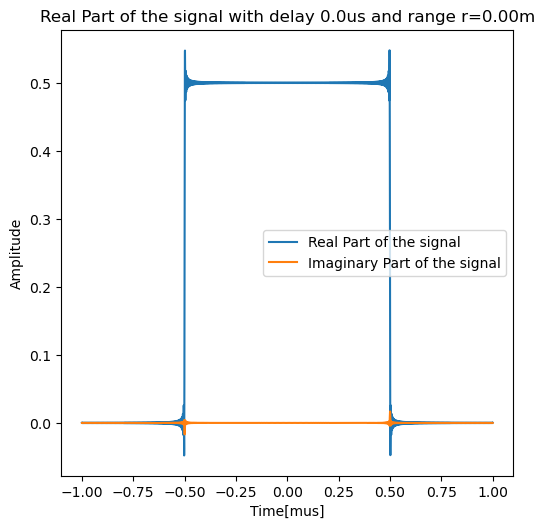

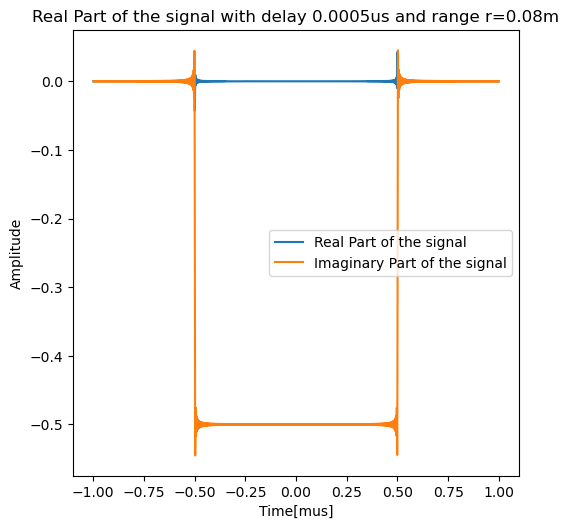

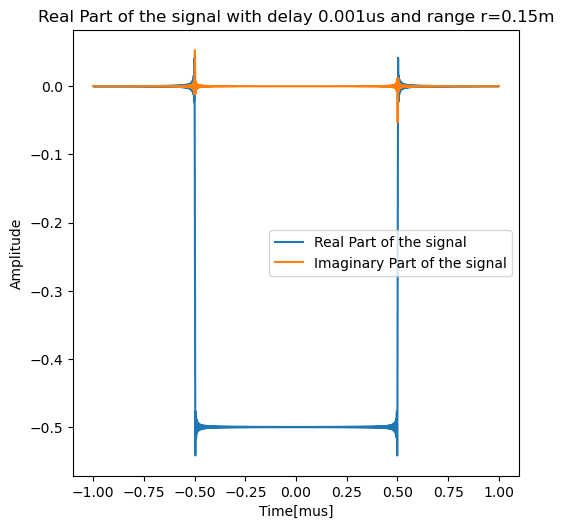

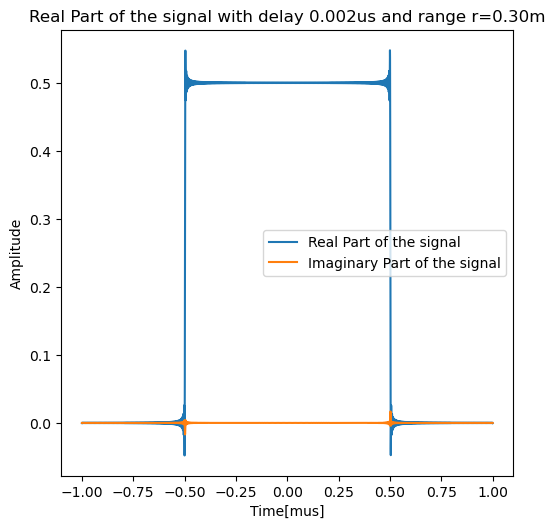

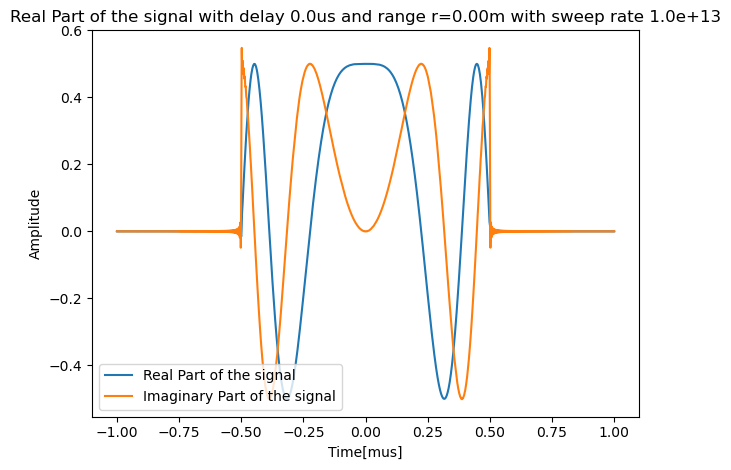

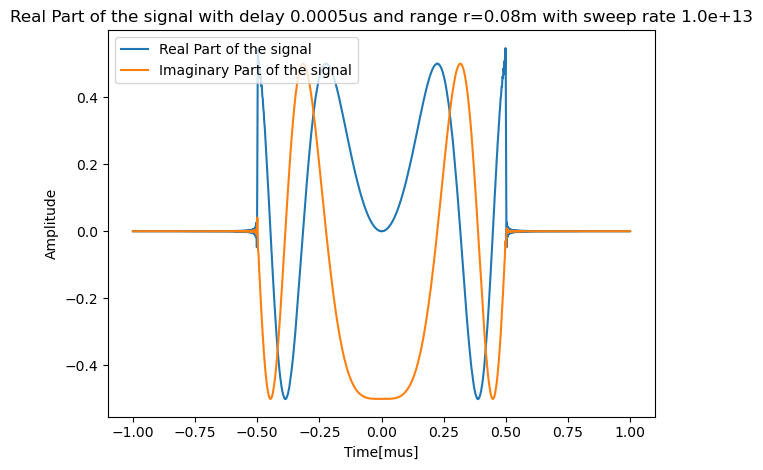

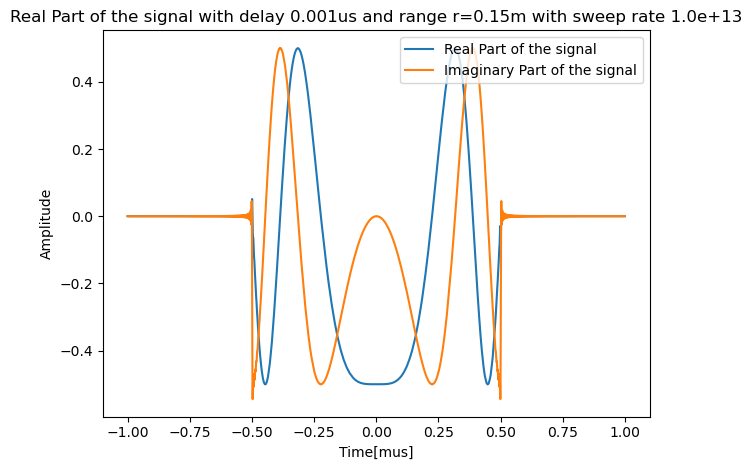

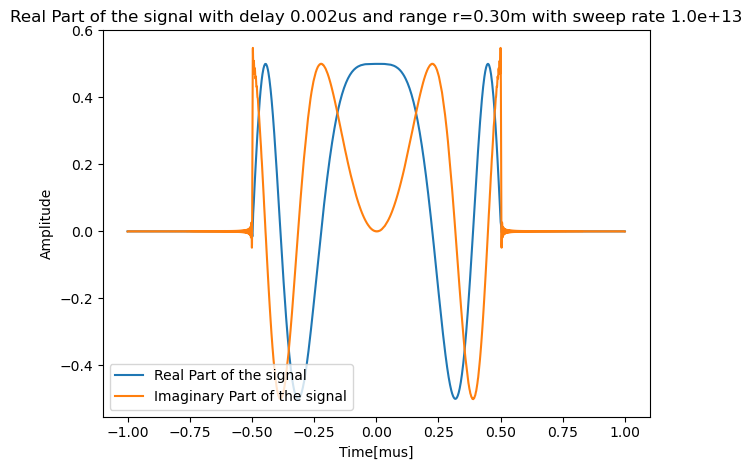

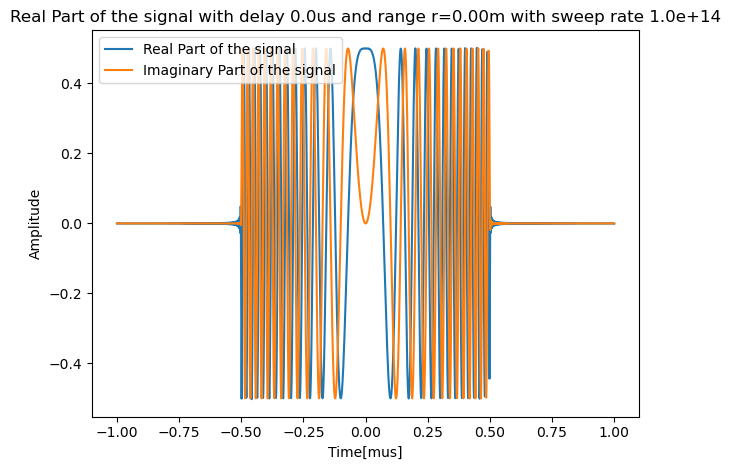

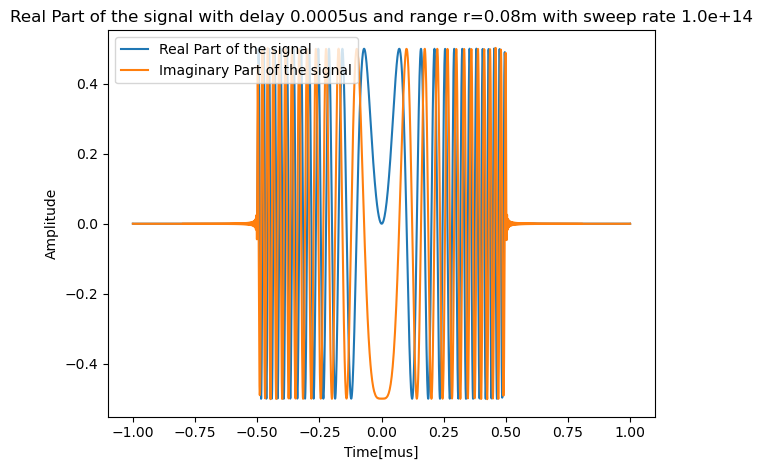

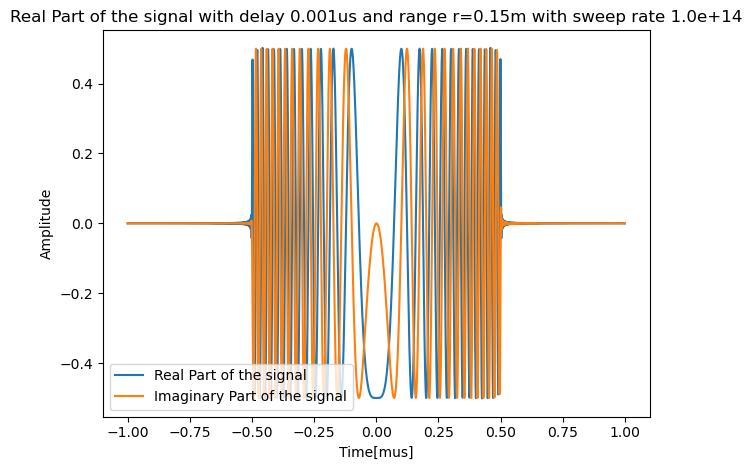

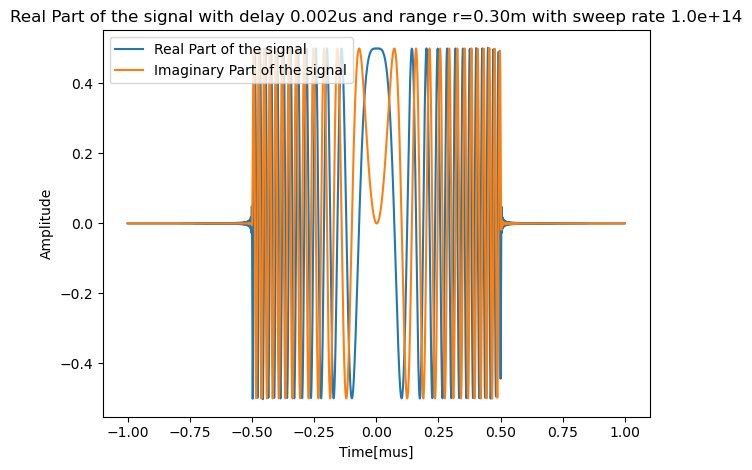

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#1.Plotting real and imaginary parts of the LPF signal
Tp=1e-6
f0=500e6
fs=5*f0
Ts=1/fs
c=3e8
wl=c/f0
wavelength=c/f0
def radar_echo(t,f0,Tp,kr=0):
    urf_t=np.where(np.abs(t)<Tp/2,np.cos(2*np.pi*f0*t+(np.pi*kr*(t**2))),0)
    return urf_t

def ideal_lowpass(t,urf_t,B_lp):
    urf_f=np.fft.fft(urf_t)
    f=np.fft.fftfreq(t.size,Ts)
    H_lp=np.where(np.abs(f)<(B_lp/2),1,0)
    u_lp=np.fft.ifft(urf_f*H_lp)
    return u_lp


t=np.arange(-Tp,Tp,Ts)
f=np.fft.fftfreq(t.size,Ts)
urf_t=radar_echo(t,f0,Tp,0)
urft_r=urf_t*(np.cos(2*np.pi*f0*t))
urft_i=urf_t*(-np.sin(2*np.pi*f0*t))
real_urft=ideal_lowpass(t,urft_r,f0)
imag_urft=ideal_lowpass(t,urft_i,f0)
# plt.plot(t/1e-6,real_urft,label='Real Part of the signal')

# plt.plot(t/1e-6,imag_urft,label='Imaginary Part of the signal')
# plt.xlabel("Time[mus]")
# plt.ylabel("Amplitude")
# plt.title("Real part")
# plt.legend()
# plt.tight_layout()
# plt.show()

#2 Equivalent LPF signal with delay

r_vector=np.array([0.0,0.125,0.25,0.5])*wl
del_t=(2*r_vector)/c
for i in del_t:
    t1=t.copy()
    t1-=i
    f=np.fft.fftfreq(t.size,Ts)
    urf_t=radar_echo(t1,f0,Tp,0)
    urft_r=urf_t*(np.cos(2*np.pi*f0*t))
    urft_i=urf_t*(-np.sin(2*np.pi*f0*t))
    real_urft=ideal_lowpass(t,urft_r,f0)
    imag_urft=ideal_lowpass(t,urft_i,f0)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,list(del_t).index(i)+1)
    plt.plot(t/1e-6,real_urft,label='Real Part of the signal ')
    plt.plot(t/1e-6,imag_urft,label='Imaginary Part of the signal')
    plt.xlabel("Time[mus]")
    plt.ylabel("Amplitude")
    plt.title(f"Real Part of the signal with delay {i*1e6}us and range r={i*c/2:.2f}m")
    plt.legend()
    plt.tight_layout()
    plt.show()

#3 Equivalent LPF signal with different sweep rate

Kr=[1e13,1e14]
for kr in Kr:
    for i in del_t:
        t1=t.copy()
        t1-=i
        f=np.fft.fftfreq(t.size,Ts)
        urf_t=radar_echo(t1,f0,Tp,kr)
        urft_r=urf_t*(np.cos(2*np.pi*f0*t))
        urft_i=urf_t*(-np.sin(2*np.pi*f0*t))
        real_urft=ideal_lowpass(t,urft_r,f0)
        imag_urft=ideal_lowpass(t,urft_i,f0)
        #plt.subplot(2,4,list(Kr).index(kr)+list(del_t).index(i)+1)
        plt.plot(t/1e-6,real_urft,label='Real Part of the signal')
        plt.plot(t/1e-6,imag_urft,label='Imaginary Part of the signal')
        plt.xlabel("Time[mus]")
        plt.ylabel("Amplitude")
        plt.title(f"Real Part of the signal with delay {i*1e6}us and range r={i*c/2:.2f}m with sweep rate {kr:.1e}")
        plt.legend()
        plt.tight_layout()
        plt.show()




### 4.2 **Simulation of Received Radar Signal for 1 and 2 Point Scatterers**

Assume that a radar with a center frequency of 10 GHz transmits a pulse whose complex baseband representation is given by



$ u_{T_x}(\tau) = \text{rect}\left(\frac{\tau}{T_p}\right) \cdot \exp(-j \pi k_r \tau^2) $ 

with $ T_p = 10 \, \mu s $  and $ k_r = 1 \cdot 10^{12} \, \text{Hz/s} $

1. Plot the real and imaginary parts of the baseband signal in the transmitter.
2. Plot the real and imaginary parts of the baseband signal in the receiver assuming a single point scatterer at a range of 500 m.
3. How does the response change if you increase the scatterer distance in steps of 5% of the wavelength?
4. Add to your simulation a second point scatterer of equal reflectivity that has an additional range of 10% of the wavelength. How does the additional scatterer change the response?
5. What happens if you increase the distance between the two point scatterers to 25% of the wavelength? Can you explain the result?


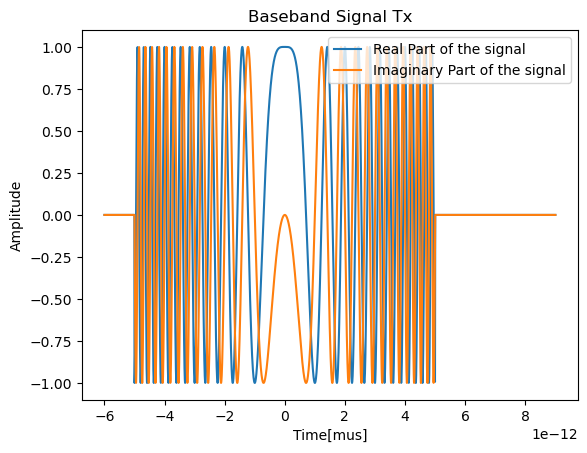

In [2]:
#1 Real and Imaginary parts of the baseband signal

def radar_echo(t,Tp,kr):
    u_tx=np.where(np.abs(t)<Tp/2,np.exp(-1j*np.pi*kr*t**2),0)
    return u_tx
f0=10e9
fs=5*f0
Ts=1/Ts
Tp=10e-6
kr=1e12
lamb=c/f0
N=2**12
c=2.998e8
t=np.linspace(-Tp*0.6,Tp*0.9,N)
ptx=radar_echo(t,Tp,kr)
ptx_real=ptx*(np.cos(2*np.pi*f0*t))
ptx_imag=ptx*(-np.sin(2*np.pi*f0*t))
plt.plot(t/1e6,np.real(ptx),label='Real Part of the signal')
plt.plot(t/1e6,np.imag(ptx),label='Imaginary Part of the signal')
plt.xlabel("Time[mus]")
plt.ylabel("Amplitude")
plt.title("Baseband Signal Tx")
plt.legend()
plt.show()



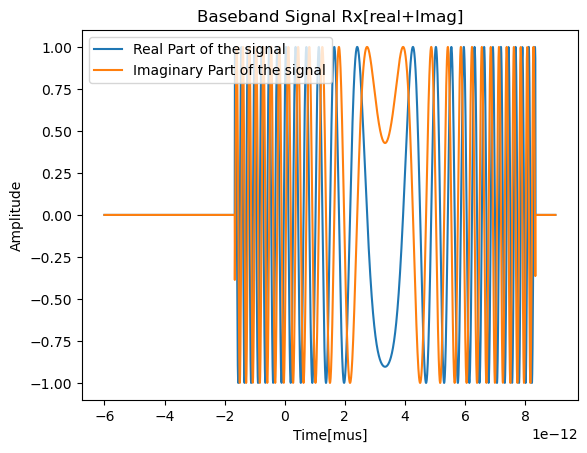

In [3]:
#2 Real and Imaginary parts of the baseband signal with range of 500m

r=500.0
delt=2*r/c
prx=radar_echo(t-delt,Tp,kr)*np.exp(-1j*2*np.pi*f0*delt)
plt.plot(t/1e6,np.real(prx),label='Real Part of the signal')
plt.plot(t/1e6,np.imag(prx),label='Imaginary Part of the signal')
plt.xlabel("Time[mus]")
plt.ylabel("Amplitude")
plt.title("Baseband Signal Rx[real+Imag]")
plt.legend()
plt.show()

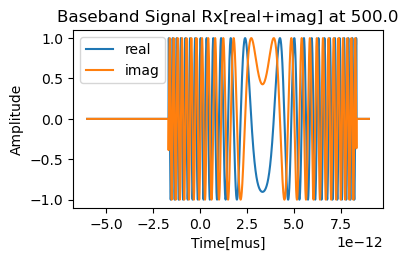

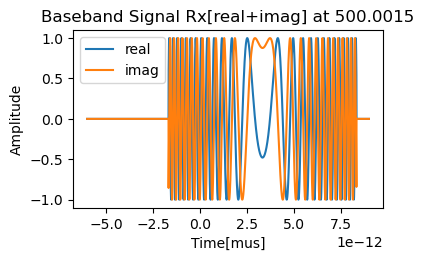

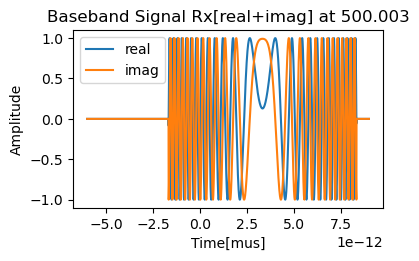

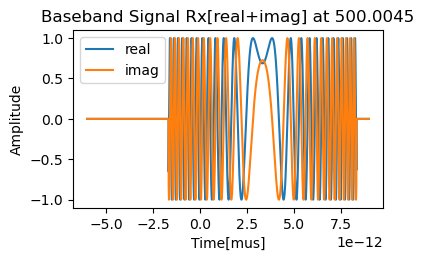

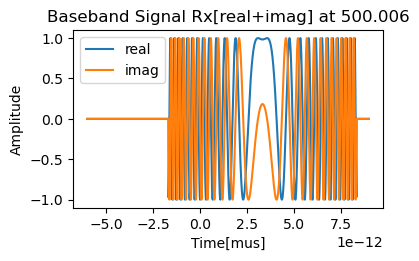

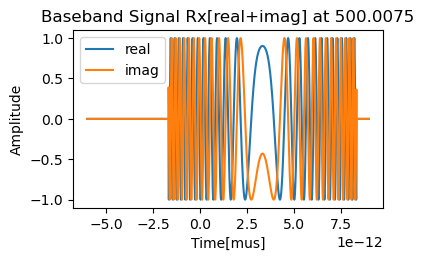

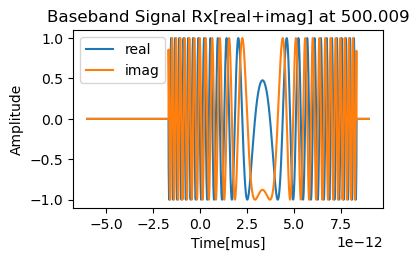

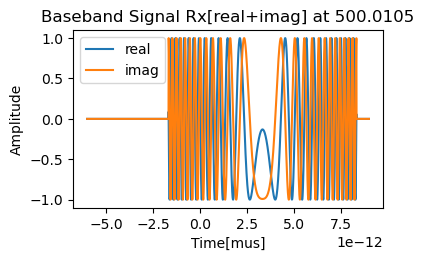

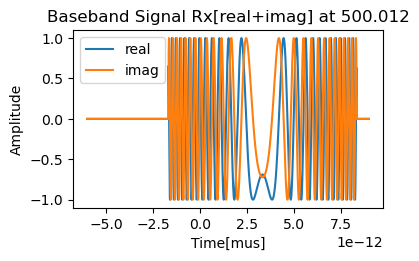

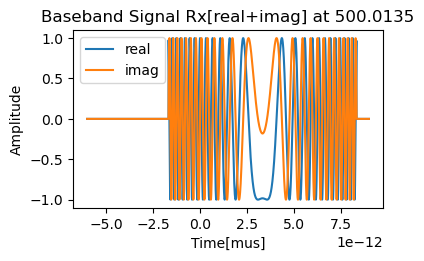

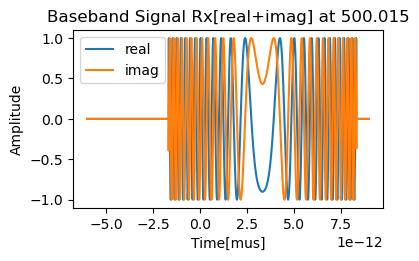

In [4]:
#3 Real and Imaginary parts of the baseband signal with increased range of 0.05*lambda

for i in range(11):
    r=500+(0.05*i*lamb)
    delt=2*r/c
    prx=radar_echo(t-delt,Tp,kr)*np.exp(-1j*2*np.pi*f0*delt)
    plt.figure(figsize=(4,30))
    plt.subplot(11,1,i+1)
    plt.plot(t/1e6,np.real(prx),label='real')
    plt.plot(t/1e6,np.imag(prx),label='imag')
    plt.xlabel("Time[mus]")
    plt.ylabel("Amplitude")
    plt.title(f"Baseband Signal Rx[real+imag] at {r}")
    plt.legend()
    plt.show()

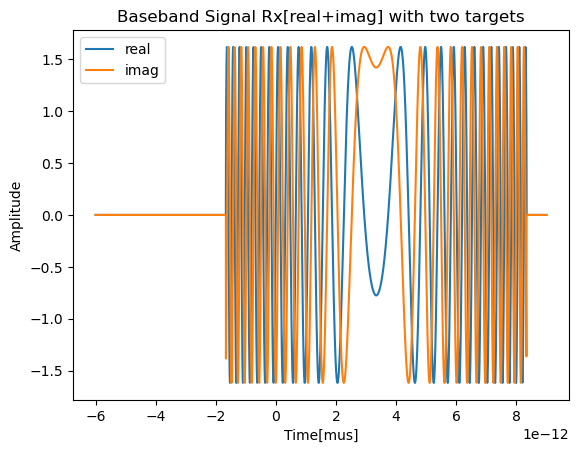

In [5]:
#4 Real and Imaginary parts of the baseband signal with two targets with distance between them 0.1*lambda
r0=500.0
r1=r0+0.1*lamb
u_rx=radar_echo(t-2*r0/c,Tp,kr)*np.exp(-1j*2*np.pi*f0*2*r0/c)+radar_echo(t-2*r1/c,Tp,kr)*np.exp(-1j*2*np.pi*f0*2*r1/c)
plt.plot(t/1e6,np.real(u_rx),label='real')
plt.plot(t/1e6,np.imag(u_rx),label='imag')
plt.xlabel("Time[mus]")
plt.ylabel("Amplitude")
plt.title("Baseband Signal Rx[real+imag] with two targets")
plt.legend()
plt.show()

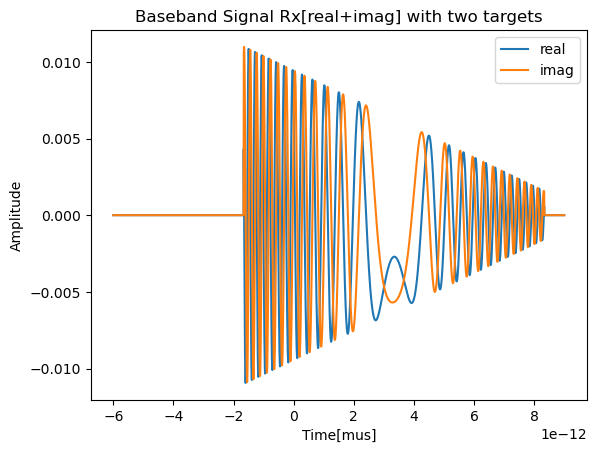

In [11]:
#5 Real and Imaginary parts of the baseband signal with two targets with distance between them 0.25*lambda

r0=500.0
r1=r0+0.75*lamb
u_rx=radar_echo(t-2*r0/c,Tp,kr)*np.exp(-1j*2*np.pi*f0*2*r0/c)+radar_echo(t-2*r1/c,Tp,kr)*np.exp(-1j*2*np.pi*f0*2*r1/c)
plt.plot(t/1e6,np.real(u_rx),label='real')
plt.plot(t/1e6,np.imag(u_rx),label='imag')
plt.xlabel("Time[mus]")
plt.ylabel("Amplitude")
plt.title("Baseband Signal Rx[real+imag] with two targets")
plt.legend()
plt.show()


### 4.3 **Simulate RCS Fluctuation**

1. Assume a CW radar with a frequency of 3 GHz that images a rectangular box with 50 randomly distributed scatterers. All point scatterers have the same RCS $\sigma_i = 1 \, m^2 $ and phase $ \phi_i = 0^\circ $. The box has a dimension of 10 m x 5 m and its distance from the radar is 10 km.

    a. Simulate and plot the fluctuation of the total radar cross section for a systematic variation of the aspect angle $\theta $.

    b. Over what angular interval $ \Delta \theta $ remains the radar cross section roughly constant (assume, e.g., a RCS deviation of 3 dB from the local maximum)?

    c. Analyze for two fixed aspect angles of $ \theta = 0^\circ $ and $ \theta = 90^\circ $ the change of the RCS for slight variations of the radar frequency. Is there a difference?

2. Keep the aspect angle fixed at $ \theta = 0^\circ $
    a. Compute the RCS for 1000 different scatterer arrangements (realizations).
    
    b. Compute the histogram of
        i. the RCS (proportional to the received power)
        ii. the square root of the RCS (proportional to the received amplitude)


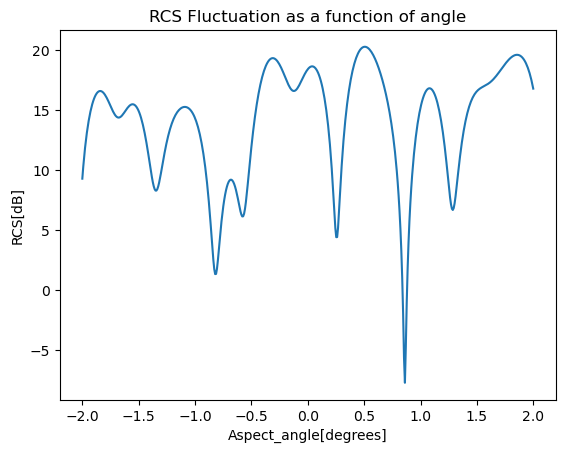

In [28]:
#1.a) RCS fluctuation as a function of angle
import numpy as np
import matplotlib.pyplot as plt

f0=3e9
c=2.998e8
lamb_da=c/f0
N_scatt=50
w=10
h=5
r0=10e3
sig_i=1
phi_i=0
px=w*(np.random.rand(N_scatt)-0.5)
py=h*(np.random.rand(N_scatt)-0.5)
n_theta=500
aspect_angle=np.deg2rad(np.linspace(-2,2,n_theta))
RCS=np.zeros(n_theta)
for i in range(n_theta):
    x_radar=r0*np.sin(aspect_angle[i])
    y_radar=-r0*np.cos(aspect_angle[i])
    ra=np.sqrt((x_radar-px)**2+(y_radar-py)**2)
    RCS[i]=np.abs(np.sum(np.sqrt(sig_i)*np.exp((-4j*np.pi*ra/lamb_da)+phi_i)))**2
plt.plot(np.rad2deg(aspect_angle),10*np.log10(RCS))
plt.title("RCS Fluctuation as a function of angle")
plt.xlabel("Aspect_angle[degrees]")
plt.ylabel("RCS[dB]")
plt.show()



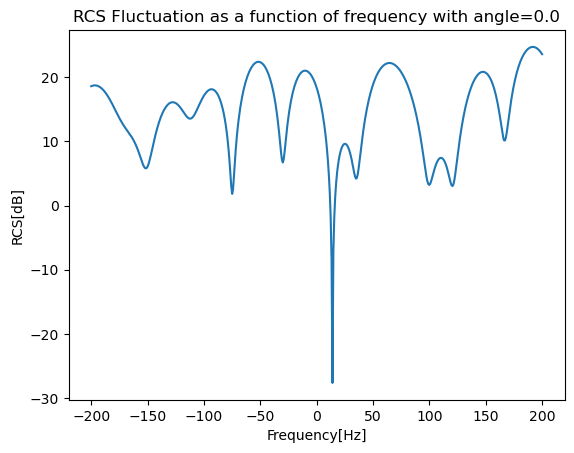

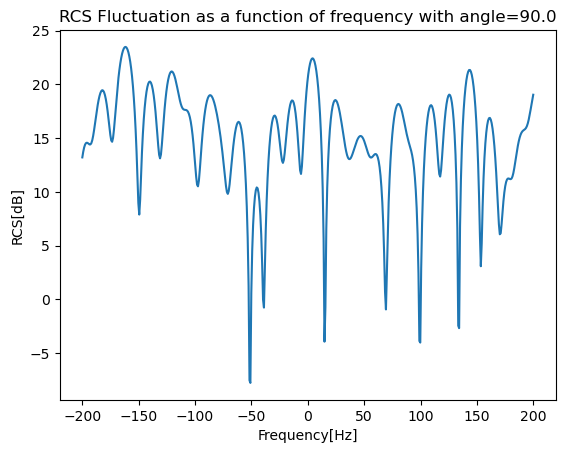

In [ ]:
#1.c) RCS fluctuation as a function of frequency
aspect_angle_fix=np.deg2rad(np.array([0,90]))
n_freq=500
freq=np.linspace(f0-200e6,f0+200e6,n_freq)
RCS=np.zeros(n_freq)
for angle in aspect_angle_fix:
    for i in range(n_freq):
        x_radar=r0*np.sin(angle)
        y_radar=-r0*np.cos(angle)
        r=np.sqrt((x_radar-px)**2+(y_radar-py)**2)
        lmbd=c/freq[i]
        RCS[i]=np.abs(np.sum(np.sqrt(sig_i)*np.exp((-4j*np.pi*r/lmbd)+phi_i)))**2
    plt.plot((freq-f0)/1e6,10*np.log10(RCS))
    plt.title(f"RCS Fluctuation as a function of frequency with angle={np.rad2deg(angle)}")
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("RCS[dB]")
    plt.show()

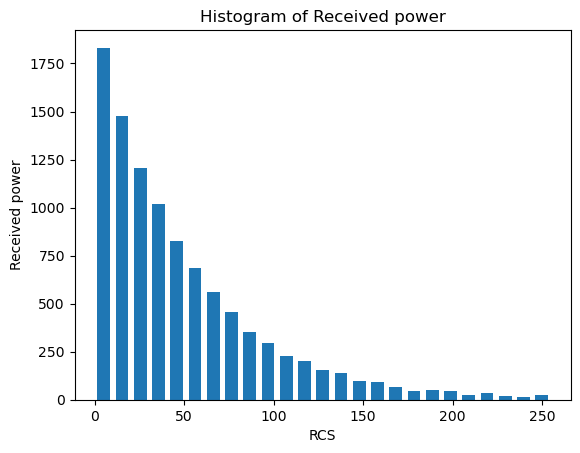

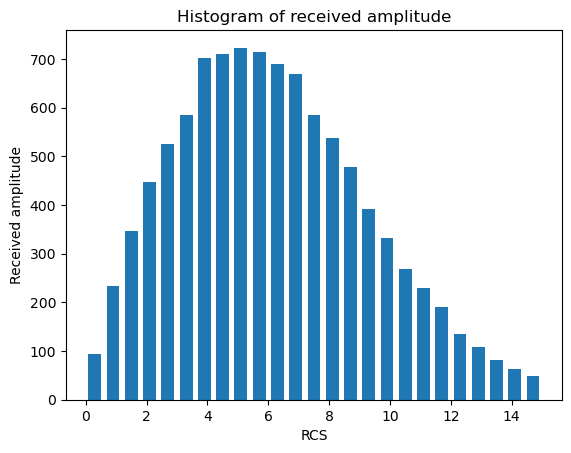

In [32]:
#2.a) RCS for 10000 realizations
aspect_angle=0
x_radar=r0*np.sin(aspect_angle)
y_radar=-r0*np.cos(aspect_angle)
n_realizations=10000
RCS=np.zeros(n_realizations)
for i in range(n_realizations):
    px=w*(np.random.rand(N_scatt)-0.5)
    py=h*(np.random.rand(N_scatt)-0.5)
    r=np.sqrt((x_radar-px)**2+(y_radar-py)**2)
    RCS[i]=np.abs(np.sum(np.sqrt(sig_i)*np.exp((-4j*np.pi*r/lamb_da)+phi_i)))**2

#2.b) i)Histogram of RCS
nbins=25
plt.hist(RCS,nbins,rwidth=0.7,range=[0,255])
plt.xlabel("RCS")
plt.ylabel("Received power")
plt.title("Histogram of Received power")
plt.show()

#2.b) ii) Histogram of squared RCS
plt.hist(np.sqrt(RCS),nbins,rwidth=0.7,range=[0,15])
plt.xlabel("RCS")
plt.ylabel("Received amplitude")
plt.title("Histogram of received amplitude")
plt.show()

### 4.4 **Rayleigh and Exponential Statistics**

1. Analyze the statistics of the RCS fluctuations by simulating the received signal amplitudes for a large number of random scatterer realizations.

   a) Define a complex vector with $ N $ entries (e.g. $ N = 10000 $) which collects the simulated baseband amplitudes for the different random scatterer realizations.

   b) Compute for each random scatterer realization the complex signal amplitude. Each individual scatterer shall contribute with a uniform amplitude and a random phase (you may start by choosing $ M = 50 $ scatterers for each realization).
   
   c) Compute the histogram of both the power and the magnitude of the received baseband amplitudes.

2. Compare your results to the analytically predicted pdfs. Do they fit?

3. Repeat the analysis for a varying number of scatterers $ M $. For which number can the amplitude and power statistics be approximated reasonably well by a Rayleigh and exponential distribution, respectively?


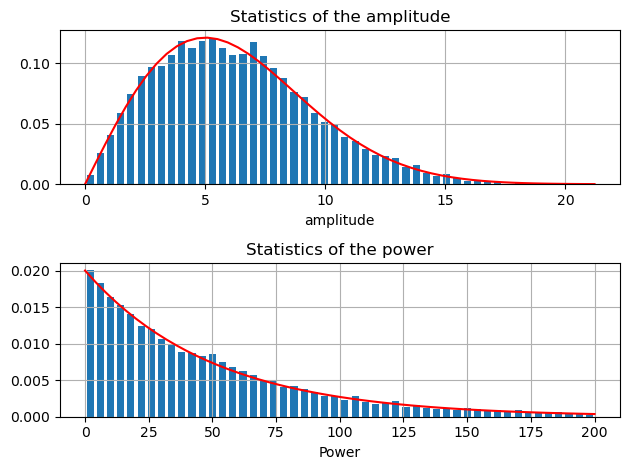

In [4]:
#1. a) Define the parameters
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
M=50
N=10000
u=np.zeros(N,dtype=np.complex128)

#1. b) Generate the Complex signal amplitude for each scatterer
for i in range(N):
    u[i]=np.sum(np.exp(1j*2*np.pi*np.random.rand(M)))
u_abs=np.abs(u)
u_power=u_abs**2

#1. c) Plot the statistics of the amplitude and power
nbins=50
bins=np.linspace(0,3*np.sqrt(M),nbins+1)
fig,ax=plt.subplots(2,1)
n,bin,patches=ax[0].hist(u_abs,nbins,density=True,rwidth=0.7,range=[0,3*np.sqrt(M)])

#2 Theoretical distribution of the amplitude and power
u_abs_theo=2*bin/M*np.exp(-bin**2/M)
ax[0].plot(bin,u_abs_theo,color="Red")
ax[0].set_title("Statistics of the amplitude")
ax[0].set_xlabel("amplitude")
ax[0].grid()
n,bins,patches=ax[1].hist(u_power,nbins,density=True,rwidth=0.7,range=[0,4*M])
u_power_theo=1/M*(np.exp(-bins/M))
ax[1].plot(bins,u_power_theo,color="Red")
ax[1].set_title("Statistics of the power")
ax[1].set_xlabel("Power")
ax[1].grid()
plt.tight_layout()
plt.show()

### 4.5 ***Target Decorrelation via Ensembles***

Reuse your previous Python program where you simulated the radar cross-section fluctuations for a large number of point scatterers. Change the box size appropriately and compute the backscatter correlation for various difference angles $\Delta \theta $ by performing the following steps:

1. Compute two vectors with the radar cross sections for the angles $ \theta_0 $ and $ \theta_0 + \Delta \theta $. Each vector element represents the response to a different random scatterer ensemble.

2. Compute for each difference angle $\Delta \theta $ the correlation between the two RCS vectors.

3. Plot the correlations as a function of the difference angles $ \Delta \theta $ and compare this plot to the analytically derived predictions.


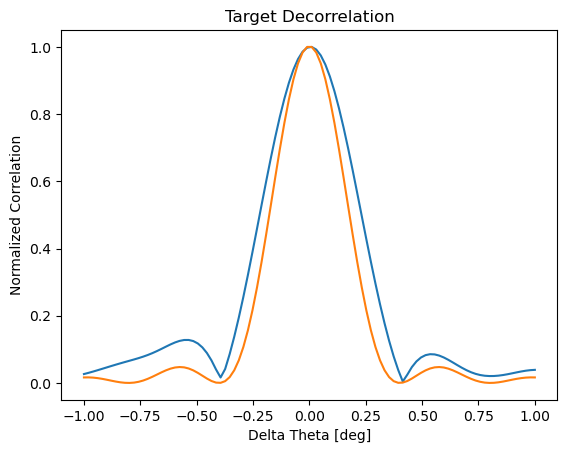

In [33]:

import numpy as np 
import matplotlib.pyplot as plt
lmbd=0.1
N_scatt=100
N_ensemble=1000
w=10
h=5
r0=10e3
theta0=np.deg2rad(45)
n_del_theta=100
del_theta=np.deg2rad(np.linspace(-1,1,n_del_theta))
x=np.zeros([N_ensemble,N_scatt])
y=np.zeros([N_ensemble,N_scatt])
for i in range(N_ensemble):
    x[i,:] = w*(np.random.rand(N_scatt)-0.5)
    y[i,:] = h*(np.random.rand(N_scatt)-0.5)
corr=np.zeros(n_del_theta)
x1_radar = r0*np.sin(theta0)
y1_radar = -r0*np.cos(theta0)
r1 = np.sqrt((x1_radar-x)**2+(y1_radar-y)**2)
u1 = np.sum(np.exp(-4j*np.pi/lmbd*r1),1)

for i in range(n_del_theta):
    x2_radar = r0 * np.sin(theta0+del_theta[i])
    y2_radar = -r0 * np.cos(theta0+del_theta[i])
    r2 = np.sqrt((x2_radar-x)**2+(y2_radar-y)**2)
    u2 = np.sum(np.exp(-4j*np.pi/lmbd*r2),1)
    corr[i] = np.abs(np.sum(u1*np.conj(u2)))

dk_theta_x = 2*np.pi/lmbd*np.cos(theta0)*del_theta
dk_theta_y=2*np.pi/lmbd*np.sin(theta0)*del_theta
M = 50
dx = 0.1
dy=0.1
acf = np.pi/dx*np.sin((2*M+1)*dx*dk_theta_x)/np.sin(dx*dk_theta_x)  * np.pi/dy*np.sin((2*M+1)*dy*dk_theta_y)/np.sin(dy*dk_theta_y)

plt.plot(del_theta*180/np.pi,corr/corr.max())
plt.plot(del_theta*180/np.pi,np.abs(acf)/acf.max())
plt.title("Target Decorrelation")
plt.xlabel("Delta Theta [deg]")
plt.ylabel("Normalized Correlation")
plt.show()